In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv("C:\\Users\\DELL\\Desktop\\xyza\\dsjob.csv")

In [4]:
df.isnull().mean()*100

enrollee_id                0.000000
city                       0.000000
city_development_index     0.000000
gender                    23.860968
relevent_experience        0.000000
enrolled_university        1.456083
education_level            2.442461
major_discipline          14.654767
experience                 0.234852
company_size              29.215594
company_type              29.779239
last_new_job               1.878816
training_hours             0.000000
dtype: float64

In [5]:
cols=[var for var in df.columns if df[var].isnull().mean() < 0.05 and df[var].isnull().mean() > 0]
cols

['enrolled_university', 'education_level', 'experience', 'last_new_job']

In [6]:
df[cols].sample(5)

,enrolled_university,education_level,experience,last_new_job
1689,Full time course,High School,2,1
1726,no_enrollment,Graduate,10,NaN
1063,no_enrollment,Graduate,5,1
527,no_enrollment,Graduate,5,1
197,no_enrollment,Graduate,1,never


In [7]:
df['education_level'].value_counts()

education_level
Graduate          1269
Masters            496
High School        222
Phd                 54
Primary School      36
Name: count, dtype: int64

In [8]:
len(df[cols].dropna()) / len(df)

0.9478628464067638

In [9]:
new_df = df[cols].dropna()
df.shape,new_df.shape

((2129, 13), (2018, 4))

In [10]:
import matplotlib.pyplot as plt

<Axes: >

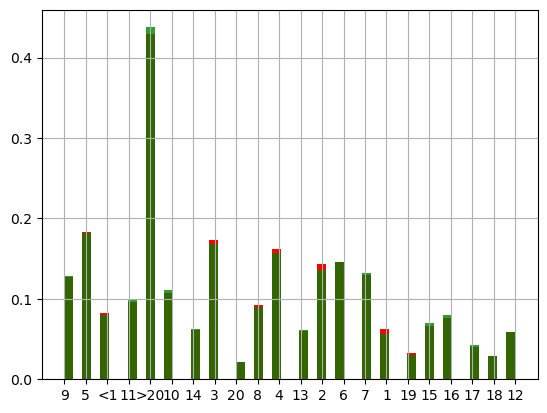

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111)

#orignal data
df['experience'].hist(bins=50,ax=ax , density=True ,color='red')


new_df['experience'].hist(bins=50,ax=ax , color='green', density=True , alpha=0.8)

In [12]:
temp = pd.concat([
            # percentage of observations per category, original data
            df['enrolled_university'].value_counts() / len(df),

            # percentage of observations per category, cca data
            new_df['enrolled_university'].value_counts() / len(new_df)
        ],
        axis=1)

# add column names
temp.columns = ['original', 'cca']

temp
                  

,original,cca
enrolled_university,,
no_enrollment,0.713481,0.727948
Full time course,0.204321,0.202180
Part time course,0.067637,0.069871


In [13]:
temp = pd.concat([
            # percentage of observations per category, original data
            df['education_level'].value_counts() / len(df),

            # percentage of observations per category, cca data
            new_df['education_level'].value_counts() / len(new_df)
        ],
        axis=1)

# add column names
temp.columns = ['original', 'cca']

temp

,original,cca
education_level,,
Graduate,0.596054,0.611497
Masters,0.232973,0.239346
High School,0.104274,0.106541
Phd,0.025364,0.026264
Primary School,0.016909,0.016353
